In [1]:
import pandas as pd

In [10]:
import datetime

In [23]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt

In [68]:
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
%%bash
ls data

space-exploration.csv


In [3]:
df_raw = pd.read_csv('data/space-exploration.csv')

In [5]:
df = df_raw.copy()

In [7]:
df.dtypes

Date                                  object
Event leading to space exploration    object
Country                               object
Researcher(s)                         object
dtype: object

In [13]:
df.iloc[21]

Date                                                                          6/20/1944
Event leading to space exploration    V-2 Rocket (MW 18014): First man-made object t...
Country                                                                         Germany
Researcher(s)                                                                 Wehrmacht
Name: 21, dtype: object

In [16]:
datetime.datetime.strptime('6/20/1944', '%m/%d/%Y')

datetime.datetime(1944, 6, 20, 0, 0)

In [19]:
def transform_date(inp):
    
    if '/' in str(inp):
        try:
            dt = datetime.datetime.strptime(inp, '%m/%d/%Y')
        except:
            dt = None
            pass
    else:
        dt = None
    
    return dt

In [57]:
df['dt_dates'] = df['Date'].apply( transform_date )
df['year'] = df['dt_dates'].apply( lambda x: x.year )
df['month'] = df['dt_dates'].apply( lambda x: x.month )
df['day'] = df['dt_dates'].apply( lambda x: x.day )


In [58]:
df_with_dates = df[~df.dt_dates.isna()]

In [59]:
df_with_dates['year'] = df_with_dates.year.astype(int)
df_with_dates['month'] = df_with_dates.month.astype(int)
df_with_dates['day'] = df_with_dates.day.astype(int)

/Users/leima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/leima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/leima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

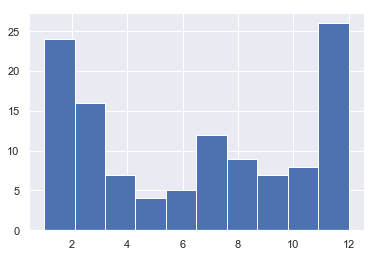

In [69]:
df_with_dates.month.hist()
plt.show()

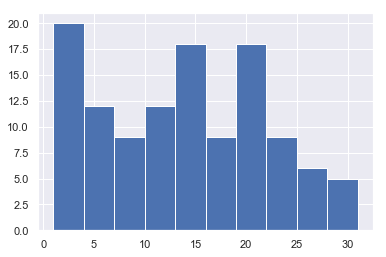

In [70]:
df_with_dates.day.hist()
plt.show()

## Produce Pretty Graph

In [116]:
df_with_dates.groupby('month').count()[ 'dt_dates']

month
1     12
2     12
3     16
4      7
5      4
6      5
7     12
8      9
9      7
10     8
11    13
12    13
Name: dt_dates, dtype: int64

In [228]:
month_hist, month_edge = np.histogram(df_with_dates.month.values, bins = np.arange(1,14))
day_hist, day_edge = np.histogram(df_with_dates.day.values, bins = np.arange(1,33))

In [229]:
month_edge

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [230]:
month_hist

array([12, 12, 16,  7,  4,  5, 12,  9,  7,  8, 13, 13])

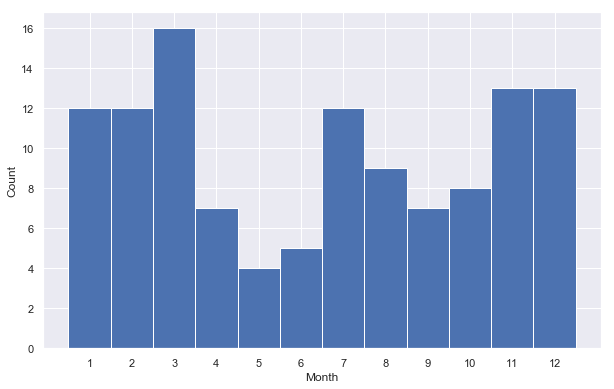

In [220]:
fig, ax = plt.subplots( figsize=(10, 6.18) )

month_x = month_edge[:-1] -0.5
ax.bar( month_x, month_hist, 1, color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725) )

ax.set_xticks( np.arange(1,13) -0.5 )
ax.set_xticklabels( [ str(i) for i in np.arange(1,13) ] )

ax.set_xlabel('Month')
ax.set_ylabel('Count')

fig.savefig('export/month-distribution.png')

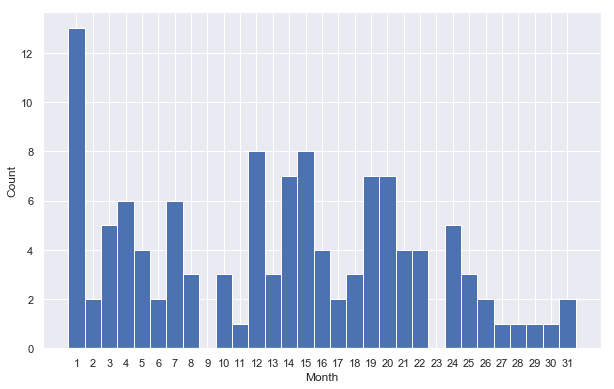

In [233]:
fig, ax = plt.subplots( figsize=(10, 6.18) )

day_x = day_edge[:-1] -0.5
ax.bar( day_x, day_hist, 1, color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725) )

ax.set_xticks( np.arange(1,32) -0.5 )
ax.set_xticklabels( [ str(i) for i in np.arange(1,32) ] )

ax.set_xlabel('Month')
ax.set_ylabel('Count')

fig.savefig('export/day-distribution.png')

== Orbital launches by year ==
{{ #invoke:Chart | bar-chart
| height = 500
| width = 900
| stack = 1
| group 1 = 1: 20: 11:<!-- 1950s -->     19: 20: 15: 17: 15: 15: 13: 12: 10: 15:<!-- 1960s -->     10: 14:  7:  8:  7:  7:  3:  6:  4:  5:<!-- 1970s -->      4:  3:  8:  2:  0:  5:  7:  4:  5:  1:<!-- 1980s -->      5:  3:  3:  4:  4:  5:  4:  3:  5:  6:<!-- 1990s -->      4:  1:  5:  3:  1:  3:  5:  3:  2:  4:<!-- 2000s -->      4:  6:  4:  3:  2:  4:  2:  5:  2:  0:<!-- 2010s -->      0<!-- 2020s -->     <!-- Failures to reach orbit -->
| group 2 = 1:  2:  2:<!-- 1950s -->      0:  2:  1:  3:  3:  1:  7:  7:  3:  4:<!-- 1960s -->      2:  1:  1:  0:  1:  1:  3:  3:  2:  1:<!-- 1970s -->      3:  6:  2:  0:  3:  2:  1:  2:  2:  0:<!-- 1980s -->      2:  2:  1:  2:  1:  3:  4:  3:  2:  0:<!-- 1990s -->      0:  0:  0:  0:  3:  0:  0:  2:  1:  1:<!-- 2000s -->      0:  0:  2:  1:  2:  1:  1:  2:  1:  0:<!-- 2010s -->      0<!-- 2020s -->     <!-- Partial failures, i.e. lower-than-expected orbit or failure of secondary mission -->
| group 3 = 1:  6: 10:<!-- 1950s -->     19: 28: 65: 50: 82:108:111:120:116:106:<!-- 1960s -->    112:119:105:109:105:124:125:121:122:105:<!-- 1970s -->    102:117:119:127:126:118:102:108:114:101:<!-- 1980s -->    114: 86: 94: 77: 88: 72: 69: 83: 75: 73:<!-- 1990s -->     81: 58: 60: 60: 50: 52: 62: 63: 66: 73:<!-- 2000s -->     70: 78: 72: 77: 88: 82: 82:  83: 90:  0:<!-- 2010s -->      0<!-- 2020s -->    <!-- Full launch successes -->
| group 4 =   0:0:0:    0:0:0:0:0:0:0:0:0:0:    0:0:0:0:0:0:0:0:0:0:    0:0:0:0:0:0:0:0:0:0:    0:0:0:0:0:0:0:0:0:0:    0:0:0:0:0:0:0:0:0:0:    0:0:0:0:0:0:0:0: 39:<!-- 2018 --> 165:<!-- 2019 --> 103<!-- 2020 -->    <!-- Future planned missions -->
| colors = FireBrick : Orange : ForestGreen : LightBlue
| group names = Failure : Partial failure : Success : Planned
| units suffix = _launches
| x legends = 1957 ::: 1960 ::::: 1965 ::::: 1970 ::::: 1975 ::::: 1980 ::::: 1985 ::::: 1990 ::::: 1995 ::::: 2000 ::::: 2005 ::::: 2010 ::::: 2015 ::::: 2020 
}}


In [149]:
def comma_strings_to_int(inp):
    
    ret = inp.split(':')
    
    ret = [ int(i) for i in ret ]
    
    return ret

In [169]:
comma_strings_to_int('70: 78: 72: 77: 88: 82: 82:  83: 90:  0')

[70, 78, 72, 77, 88, 82, 82, 83, 90, 0]

In [208]:
launch_years = np.arange(1957, 2021,1) #[ 1957,1958,1959, 1960, ... ]
failures = [ [1, 20, 11], [19, 20, 15, 17, 15, 15, 13, 12, 10, 15] , [10, 14, 7, 8, 7, 7, 3, 6, 4, 5], [4, 3, 8, 2, 0, 5, 7, 4, 5, 1], [5, 3, 3, 4, 4, 5, 4, 3, 5, 6], [4, 1, 5, 3, 1, 3, 5, 3, 2, 4], [4, 6, 4, 3, 2, 4, 2, 5, 2, 0], [0]  ]
partial_failures = [ [1, 2, 2], [0, 2, 1, 3, 3, 1, 7, 7, 3, 4], [2, 1, 1, 0, 1, 1, 3, 3, 2, 1], [3, 6, 2, 0, 3, 2, 1, 2, 2, 0], [2, 2, 1, 2, 1, 3, 4, 3, 2, 0], [0, 0, 0, 0, 3, 0, 0, 2, 1, 1], [0, 0, 2, 1, 2, 1, 1, 2, 1, 0], [0] ]
success = [ [1, 6, 10], [19, 28, 65, 50, 82, 108, 111, 120, 116, 106],  [112, 119, 105, 109, 105, 124, 125, 121, 122, 105], [102, 117, 119, 127, 126, 118, 102, 108, 114, 101], [114, 86, 94, 77, 88, 72, 69, 83, 75, 73], [81, 58, 60, 60, 50, 52, 62, 63, 66, 73], [70, 78, 72, 77, 88, 82, 82, 83, 91, 0], [0] ]
planned = [[0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 39, 165], [103] ]

In [214]:
df_launches = pd.DataFrame( { 
    'launch year': launch_years, 
    'failure': [item for sublist in failures for item in sublist], 
    'partial failure': [item for sublist in partial_failures for item in sublist], 
    'success': [item for sublist in success for item in sublist], 
    'planned': [item for sublist in planned for item in sublist] } )
df_launches.set_index('launch year', inplace=True);

In [320]:
df_launches['success rate'] = df_launches.apply( lambda x: x['success'] / (x['failure'] + x['partial failure'] + x['success']) , axis=1)

/Users/leima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [352]:
df_launches['mean success rate after 2000'] = df_launches[ ['success rate' ] ].loc[2000:].describe().loc['mean'].values[0]
df_launches['std success rate after 2000'] = df_launches[ ['success rate' ] ].loc[2000:].describe().loc['std'].values[0]

In [353]:
df_launches.head()

,failure,partial failure,success,planned,success rate,mean success rate after 2000,std success rate after 2000
launch year,,,,,,,
1957,1,1,1,0,0.333333,0.943651,0.017766
1958,20,2,6,0,0.214286,0.943651,0.017766
1959,11,2,10,0,0.434783,0.943651,0.017766
1960,19,0,19,0,0.500000,0.943651,0.017766
1961,20,2,28,0,0.560000,0.943651,0.017766


In [354]:
df_launches.to_csv('data/space-exploration-launches-by-year.csv')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


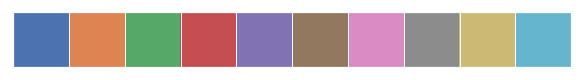

In [355]:
current_palette = sns.color_palette()
print(current_palette)
sns.palplot(current_palette)

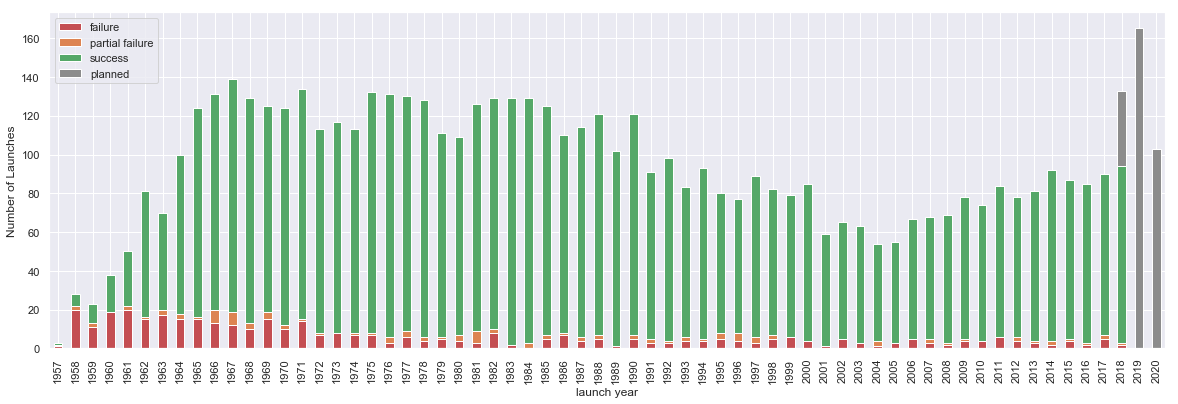

In [356]:
fig, ax = plt.subplots( figsize=(20,6.18) )

df_launches[ ['failure', 'partial failure', 'success', 'planned' ] ].plot.bar(stacked=True, ax=ax, color= ['r',(0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)] )
ax.set_xticklabels( launch_years );
ax.set_ylabel('Number of Launches')
fig.savefig('export/space-launch-yearly.png')

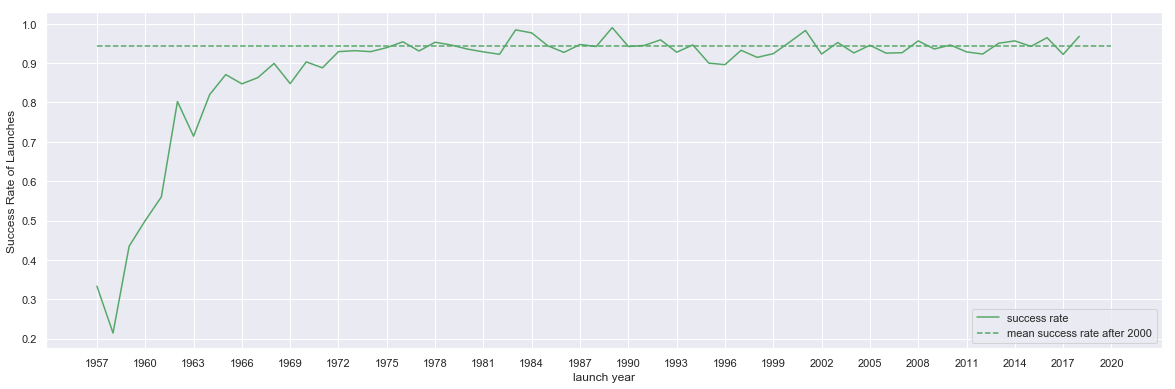

In [359]:
fig, ax = plt.subplots( figsize=(20,6.18) )

df_launches[ ['success rate', 'mean success rate after 2000' ] ].plot(ax=ax, color= 'g', style=['-', '--'] )
ax.set_xticks( launch_years[::3] )
ax.set_xticklabels( launch_years[::3] );
ax.set_ylabel('Success Rate of Launches')
fig.savefig('export/space-launch-success-rate-yearly.png')

## Air Transportation

In [235]:
df_air = pd.read_csv('data/air-transport-passengers-carried.csv')

In [239]:
df_air_t = df_air.transpose()

In [244]:
df_air_summary = df_air.describe()

In [245]:
df_air_summary

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.820000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.040000e+02,2.040000e+02,2.000000e+02,2.010000e+02,1.990000e+02,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.756383e+07,1.034285e+08,1.109374e+08,1.164027e+08,1.238505e+08,1.317110e+08,1.451395e+08,1.549384e+08,1.689135e+08,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.886695e+08,3.150289e+08,3.331397e+08,3.464099e+08,3.657630e+08,3.874896e+08,4.203152e+08,4.485057e+08,4.853347e+08,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.178400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.036000e+03,8.990000e+02,3.160000e+02,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.521030e+05,5.705530e+05,5.441007e+05,6.501305e+05,6.244718e+05,6.073530e+05,8.418162e+05,6.670620e+05,7.839970e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.347920e+06,3.372283e+06,3.786453e+06,4.082595e+06,4.637628e+06,4.566060e+06,4.766130e+06,5.220218e+06,5.450671e+06,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.165608e+07,3.621202e+07,3.898888e+07,3.996958e+07,4.353201e+07,4.492240e+07,5.041309e+07,5.381735e+07,5.836285e+07,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.249729e+09,2.628261e+09,2.786954e+09,2.894055e+09,3.048275e+09,3.227291e+09,3.466478e+09,3.705102e+09,3.978849e+09,NaN


In [247]:
df_air_sum = pd.DataFrame( {
    'count': df_air_summary.loc['count'],
    'mean': df_air_summary.loc['mean'],
    'year': df_air_summary.columns
})

In [252]:
df_air_sum.dtypes

count    float64
mean     float64
year      object
dtype: object

In [255]:
df_air_sum['sum'] = df_air_sum.apply( lambda x: x['mean'] * x['count'], axis=1 )

In [256]:
df_air_sum

,count,mean,year,sum
1960,0.0,NaN,1960,NaN
1961,0.0,NaN,1961,NaN
1962,0.0,NaN,1962,NaN
1963,0.0,NaN,1963,NaN
1964,0.0,NaN,1964,NaN
1965,0.0,NaN,1965,NaN
1966,0.0,NaN,1966,NaN
1967,0.0,NaN,1967,NaN
1968,0.0,NaN,1968,NaN
1969,0.0,NaN,1969,NaN


In [257]:
df_air_sum.to_csv( 'data/air-transport-passengers-by-year.csv' )

## Air Transportation and Death by Year

In [258]:
%%bash
ls data

air-transport-passengers-by-year.csv
air-transport-passengers-carried.csv
air-transportation-and-death-by-year.csv
space-exploration.csv


In [268]:
df_air_and_death = pd.read_csv('data/air-transportation-and-death-by-year.csv')
df_air_and_death.set_index('Year', inplace=True);

In [269]:
df_air_and_death.head()

,Deaths,Incidents,Total Passengers
Year,,,
1970,2226,298,1866157152
1971,2228,271,1995858424
1972,3346,344,1834850740
1973,2814,333,2407165400
1974,2621,270,2876067000


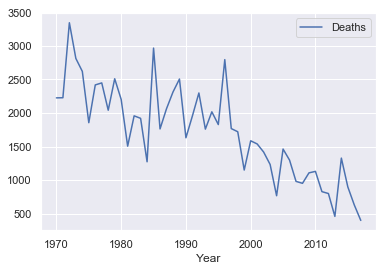

In [272]:
df_air_and_death[ ['Deaths'] ] .plot( )

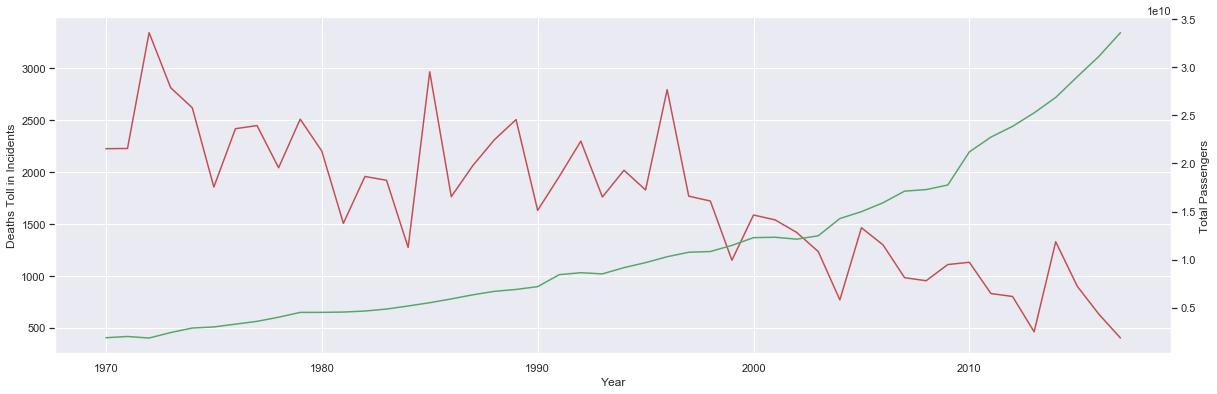

In [290]:
fig, ax1 = plt.subplots( figsize = (20,6.18) )

ax1.plot( df_air_and_death.index,  df_air_and_death['Deaths'], 'r' )
ax1.set_ylabel('Deaths Toll in Incidents')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()

ax2.plot( df_air_and_death.index,  df_air_and_death['Total Passengers'], 'g' )
ax2.set_ylabel('Total Passengers')
ax2.grid(False)
#ax2.ticklabel_format(style='plain')

fig.savefig('export/air-transport-passengers-and-death-by-year.png')

[Text(0,0,'1 Billion'), Text(0,0,'2 Billions'), Text(0,0,'3 Billions')]

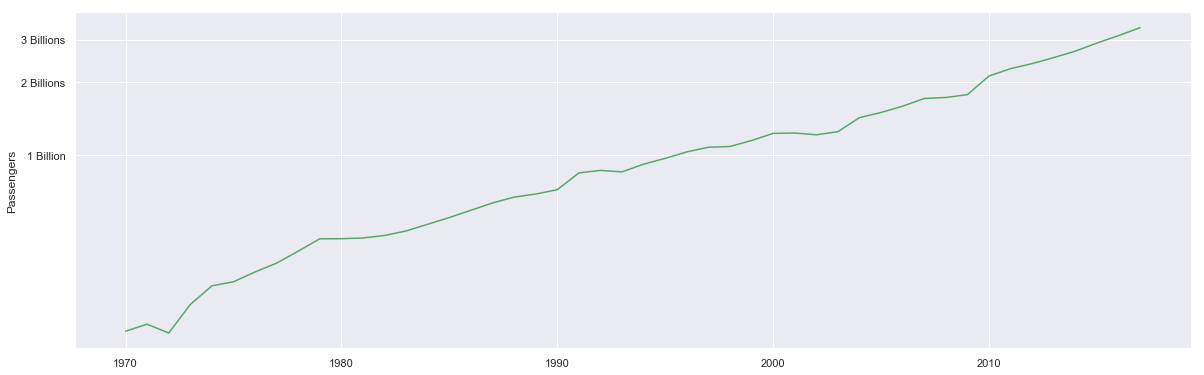

In [304]:
fig, ax = plt.subplots( figsize = (20,6.18) )


ax.semilogy( df_air_and_death.index,  df_air_and_death['Total Passengers'], 'g' )
ax.set_ylabel('Passengers')
ax.set_yticks( np.arange( 1*1e10, 4*1e10, 1e10 ) )
ax.set_yticklabels( ['1 Billion', '2 Billions', '3 Billions', '4 Billions'] )
#ax.grid(False)
#ax2.ticklabel_format(style='plain')

#fig.savefig('export/air-transport-passengers-by-year.png')